In [1]:
import numpy as np
import matplotlib.pyplot as plt

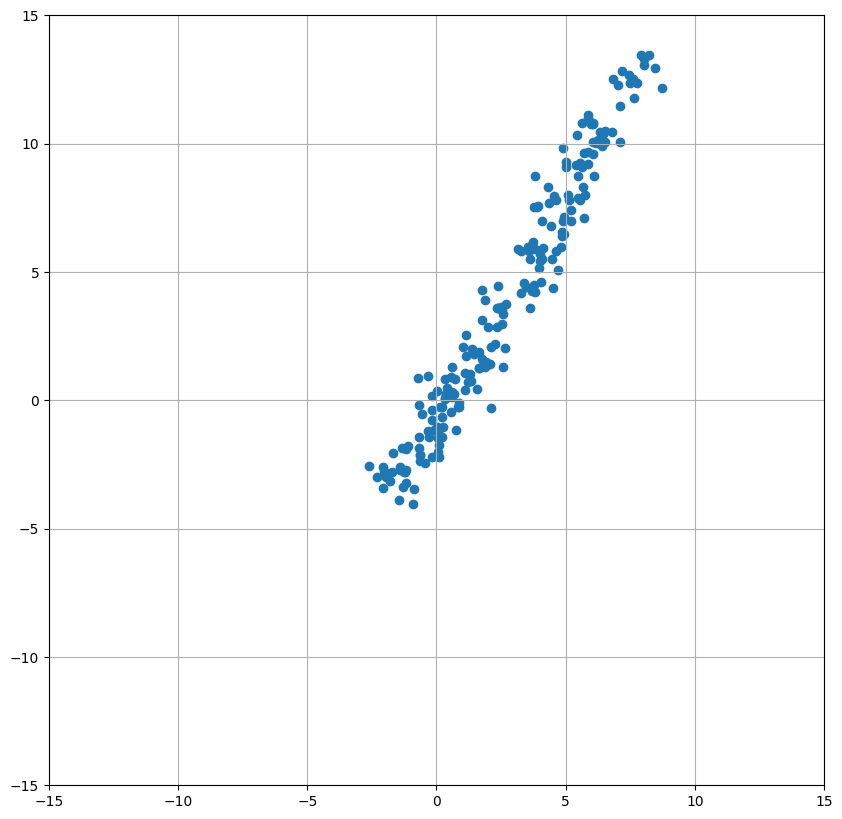

In [2]:
# Generate some data
Npoints = 200
data = np.hstack( ( (np.random.rand(Npoints,1)-0.5)*20, (np.random.randn(Npoints,1)-0.5)*0.5 ) )

alpha = 60 / 180.0 * np.pi
R = np.array( [ [np.cos(alpha), -np.sin(alpha)], [np.sin(alpha), np.cos(alpha)] ] )

data = data@R.T + np.array( [3.0,5.0])

plt.figure(figsize=(10,10))
plt.scatter( data[:,0], data[:,1])
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.grid(True)

[[ 1.67821458]
 [-0.64471335]]


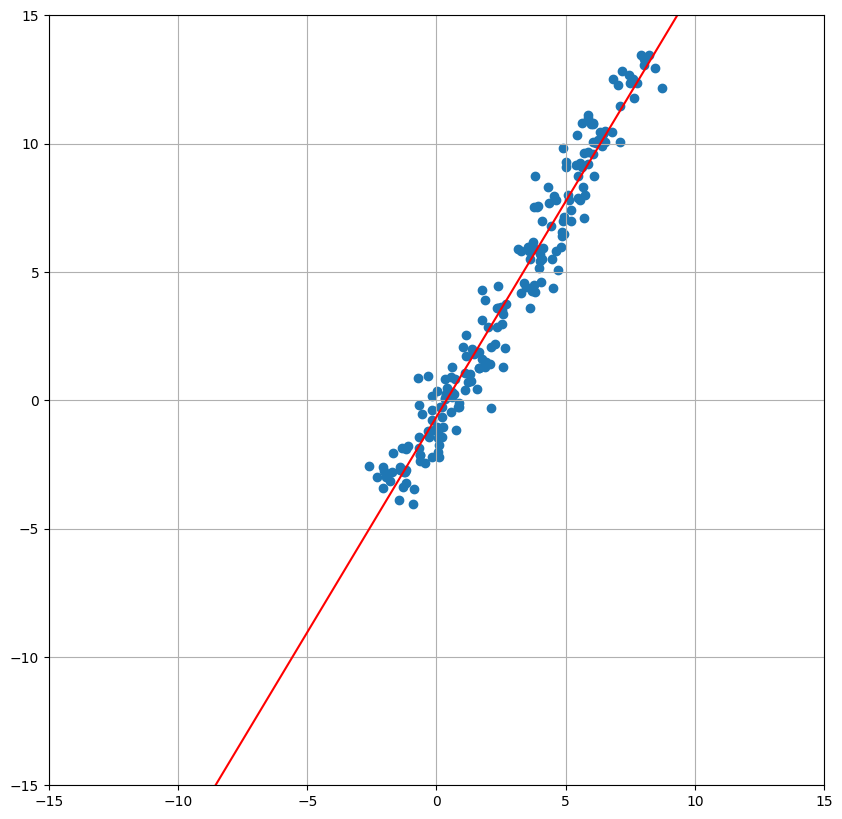

In [3]:
# Simple model fitting

X = np.vstack( (data[:,0], np.ones( (Npoints) )  ) ).T
Y = np.expand_dims( data[:,1], axis=-1)

params = np.linalg.inv( X.T @ X  ) @ X.T @ Y
print(params)

x0 = -15
x1 = 15
y0 = x0 * params[0] + params[1]
y1 = x1 * params[0] + params[1]
plt.figure(figsize=(10,10))
plt.scatter( data[:,0], data[:,1])
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.grid(True)
plt.plot([x0,x1],[y0,y1], 'r')


# Point-line distance with implicit line model

\begin{equation*}
	\begin{aligned}
        & \underset{a,b,c}{\text{argmin}} & \sum_{i=1}^N (ax_i + by_i +c)^2\\
        & \text{subject to} & a^2 + b^2 = 1
    \end{aligned}
\end{equation*}

Via Lagrange multipliers we transform the constrained minimization into an unconstrained one:

\begin{equation*}
	\begin{pmatrix}
		\overline{x^2} & \overline{xy} & \bar{x} \\
		\overline{xy} & \overline{y^2} & \bar{y} \\
		\bar{x} & \bar{y} & 1
	\end{pmatrix}
	\begin{pmatrix} a \\ b \\ c 
	\end{pmatrix}
	=
	\lambda 
	\begin{pmatrix} 2a \\ 2b \\ 0 
	\end{pmatrix}
\end{equation*}

From which we can observe that the optimum $c$ is $c=-a\bar{x} -b\bar{y}$. Substituting $c$ into the original problem we obtain the Eigenvalue problem:

\begin{equation*}
	\begin{pmatrix}
		\overline{x^2} - \bar{x}\bar{x} & \overline{xy}-\bar{x}\bar{y} \\
		\overline{xy}-\bar{x}\bar{y} & \overline{y^2} - \bar{y}\bar{y} 
		\end{pmatrix}
	\begin{pmatrix}
	a \\ b
	\end{pmatrix}
	=
	\mu \begin{pmatrix} a \\ b \end{pmatrix}
\end{equation*}


A= [[ 8.05083135 13.51102258]
 [13.51102258 23.81731602]]
Eigen values: [ 0.29139997 31.5767474 ]
Eigen vectors:  [[-0.86716708 -0.49801733]
 [ 0.49801733 -0.86716708]]


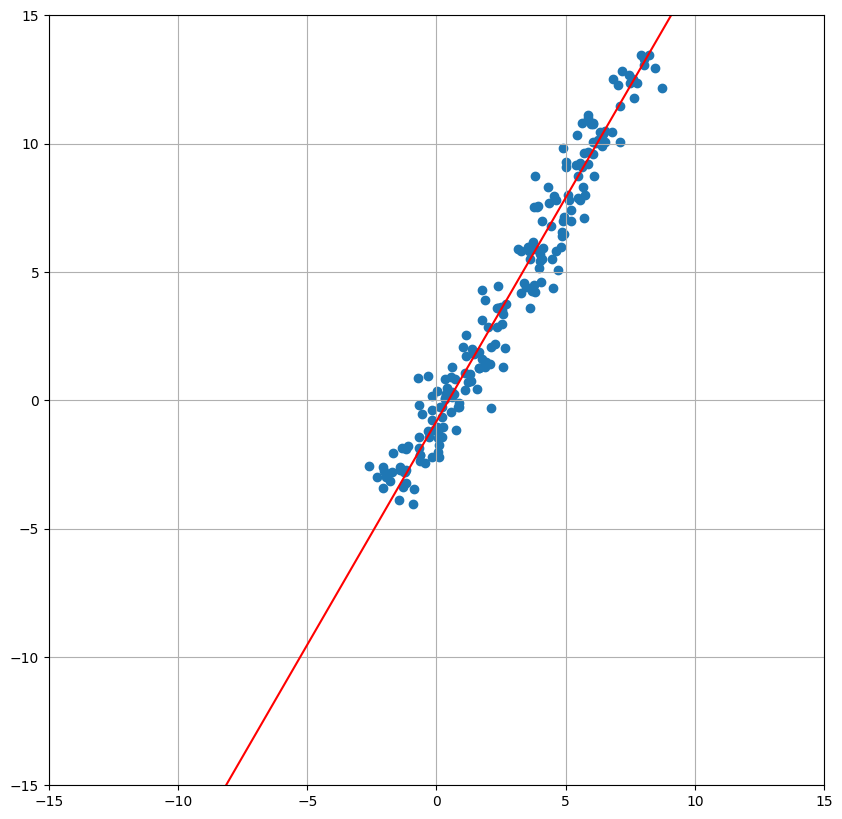

In [4]:
x = data[:,0]
y = data[:,1]

xm = np.mean(x)
ym = np.mean(y)
x2m = np.mean( x**2 )
xym = np.mean( x*y )
y2m = np.mean( y**2 )

A = np.array( [ [x2m - xm*xm , xym - xm*ym],[xym - xm*ym, y2m-ym*ym] ])
print("A=",A)
eigenvals, eigenvecs = np.linalg.eig(A)
print("Eigen values:",eigenvals)
print("Eigen vectors: ",eigenvecs)

params = eigenvecs[:,0]
a = params[0]
b = params[1]
c = -a*xm - b*ym

x0 = -15
x1 = 15
y0 = (-a*x0 - c)/b
y1 = (-a*x1 - c)/b

plt.figure(figsize=(10,10))
plt.scatter( data[:,0], data[:,1])
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.grid(True)
plt.plot([x0,x1],[y0,y1], 'r')